In [1]:
# To read and manipulate the data
import pandas as pd
pd.set_option('max_colwidth', None)
# Help to extract the data using regular exprression
import re
#help to remove punctuation
import string
#importing the NLTK Library
import nltk
# Download the Open Multilingual WordNet data, which provides multilingual WordNet data.
nltk.download("omw-1.4")
from nltk.corpus import stopwords
#helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#used in stemming
from nltk.stem.porter import PorterStemmer
#used in lemmatization
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer #for TF-IDf
# to create train , test data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pd.set_option('max_colwidth',None)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
data = pd.read_csv("Language Detection.csv")

In [3]:
df= data.copy()

In [4]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural, physical, material world or universe.",English
1,"""Nature"" can refer to the phenomena of the physical world, and also to life in general.",English
2,"The study of nature is a large, if not the only, part of science.",English
3,"Although humans are part of nature, human activity is often understood as a separate category from other natural phenomena.",English
4,"[1] The word nature is borrowed from the Old French nature and is derived from the Latin word natura, or ""essential qualities, innate disposition"", and in ancient times, literally meant ""birth"".",English


In [5]:
df.shape

(10337, 2)

In [6]:
#checking for null values
df.isna().sum()

Text        0
Language    0
dtype: int64

In [7]:
#info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [8]:
df['Language'].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64


### Test Pre-processing
- Cleaning
- Tokenization (Text segmentation)
- Vectorization


### Text Cleaning

In [9]:
# Removal of Special characters
import re

def remove_special_chars(text):
    text = re.sub('[^a-zA-Z]',' ',text)  # Replace all non-alphabetic characters with a space
    return text

# Apply the remove_special_chars function to the "Phrase" column using lambda
df["Text"] = df["Text"].apply(lambda x: remove_special_chars(x))
df.head(2)

,Text,Language
0,Nature in the broadest sense is the natural physical material world or universe,English
1,Nature can refer to the phenomena of the physical world and also to life in general,English


In [10]:
import contractions

def remove_contractions(text):
    expanded_text = [contractions.fix(word) for word in text.split()]
    text = ' '.join(expanded_text)
    return text

df["Text"] = df["Text"].apply(lambda x: remove_contractions(x))
df.head(2)
    
# data.loc[:, "Text"] = data["Text"].apply(remove_contractions)

# # Check the first 2 rows of the DataFrame to verify changes
# data.head(2)

,Text,Language
0,Nature in the broadest sense is the natural physical material world or universe,English
1,Nature can refer to the phenomena of the physical world and also to life in general,English


In [11]:
# 3. Tokenization

import os
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
from nltk import word_tokenize

data["Text"] = data.apply(lambda row: word_tokenize(row["Text"]), axis=1)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Check the first few rows of the DataFrame to verify changes
data.head(4)

,Text,Language
0,"[Nature, ,, in, the, broadest, sense, ,, is, the, natural, ,, physical, ,, material, world, or, universe, .]",English
1,"[``, Nature, '', can, refer, to, the, phenomena, of, the, physical, world, ,, and, also, to, life, in, general, .]",English
2,"[The, study, of, nature, is, a, large, ,, if, not, the, only, ,, part, of, science, .]",English
3,"[Although, humans, are, part, of, nature, ,, human, activity, is, often, understood, as, a, separate, category, from, other, natural, phenomena, .]",English


In [13]:
# 4. Lowercasing
def to_lowercase(words):
    word = [word.lower() for word in words]
    return word

data["Text"] = data["Text"].apply(lambda x: to_lowercase(x))
data.head(4)

,Text,Language
0,"[nature, ,, in, the, broadest, sense, ,, is, the, natural, ,, physical, ,, material, world, or, universe, .]",English
1,"[``, nature, '', can, refer, to, the, phenomena, of, the, physical, world, ,, and, also, to, life, in, general, .]",English
2,"[the, study, of, nature, is, a, large, ,, if, not, the, only, ,, part, of, science, .]",English
3,"[although, humans, are, part, of, nature, ,, human, activity, is, often, understood, as, a, separate, category, from, other, natural, phenomena, .]",English


In [14]:
# 5. Removal of Stopwords

from nltk.corpus import stopwords
stop_words= stopwords.words("english")
def remove_stopwords(words):
    word = [word for word in words if word not in stop_words]
    return word

# Apply the function
data["Text"] = data["Text"].apply(lambda x: remove_stopwords(x))

data.head(4)

,Text,Language
0,"[nature, ,, broadest, sense, ,, natural, ,, physical, ,, material, world, universe, .]",English
1,"[``, nature, '', refer, phenomena, physical, world, ,, also, life, general, .]",English
2,"[study, nature, large, ,, ,, part, science, .]",English
3,"[although, humans, part, nature, ,, human, activity, often, understood, separate, category, natural, phenomena, .]",English


In [15]:
# 6. Lemmatization
from nltk.stem import WordNetLemmatizer  
nltk.download("wordnet")
# using lemmatization
lm= WordNetLemmatizer()
def lemmatize_words(words):
    word=[lm.lemmatize(word) for word in words]
    return word

data["Text"] = data["Text"].apply(lambda x: lemmatize_words(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
def join_words(row):
    words = " ".join([word for word in row])
    return words
data["Text"] = data["Text"].apply(lambda x: join_words(x))

# Model Deployment

- Classical Machine Learning; e.g Naive Bayes, Random Forest
- Deep Learning: e.g.LSTM , BERT

## Deploying the NLP model using Random Forest
- Here we can either use Bag of Word, TD-IDF or GloVe as our vectorizer

In [17]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["Text"])

In [19]:
import joblib
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data["Language"])

In [ ]:
# label_encoder = LabelEncoder()
# label_encoder.fit(data["Language"])

In [21]:
import joblib
joblib.dump(LabelEncoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.naive_bayes import MultinomialNB
model_MNB = MultinomialNB()
model_MNB.fit(X_train, y_train)

MultinomialNB()

In [24]:
joblib.dump(model_MNB, 'multinomial_nb_model.joblib')

['multinomial_nb_model.joblib']

In [25]:
y_pred = model_MNB.predict(X_test)

In [26]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.02%


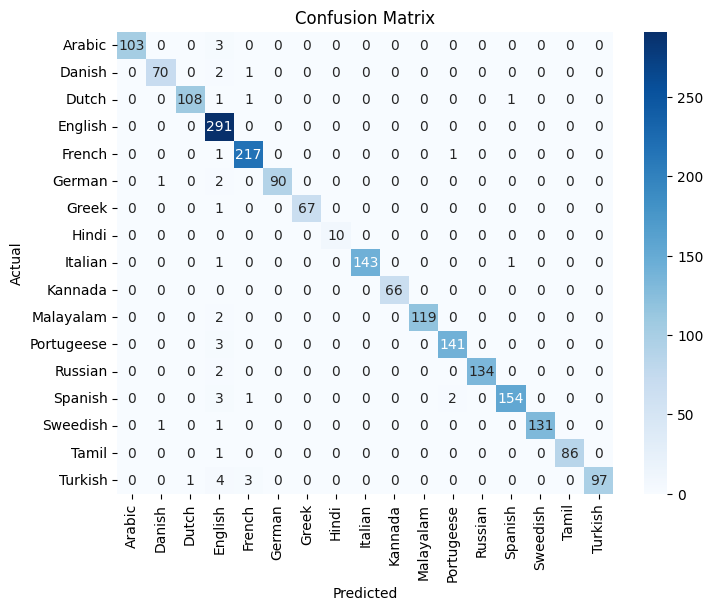

In [27]:
# Generate the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 98.02%
Classification Report:
              precision    recall  f1-score   support

      Arabic       1.00      0.97      0.99       106
      Danish       0.97      0.96      0.97        73
       Dutch       0.99      0.97      0.98       111
     English       0.92      1.00      0.96       291
      French       0.97      0.99      0.98       219
      German       1.00      0.97      0.98        93
       Greek       1.00      0.99      0.99        68
       Hindi       1.00      1.00      1.00        10
     Italian       1.00      0.99      0.99       145
     Kannada       1.00      1.00      1.00        66
   Malayalam       1.00      0.98      0.99       121
  Portugeese       0.98      0.98      0.98       144
     Russian       1.00      0.99      0.99       136
     Spanish       0.99      0.96      0.97       160
    Sweedish       1.00      0.98      0.99       133
       Tamil       1.00      0.99      0.99        87
     Turkish       1.00      0.92      0.

In [29]:
print("Vectorizer Parameters:")
print(vectorizer.get_params())

Vectorizer Parameters:
{'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.int64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'max_df': 1.0, 'max_features': None, 'min_df': 1, 'ngram_range': (1, 1), 'preprocessor': None, 'stop_words': None, 'strip_accents': None, 'token_pattern': '(?u)\\b\\w\\w+\\b', 'tokenizer': None, 'vocabulary': None}


In [30]:
# Inspect label encoder classes
print("\nLabel Encoder Classes:")
print(label_encoder.classes_)


Label Encoder Classes:
['Arabic' 'Danish' 'Dutch' 'English' 'French' 'German' 'Greek' 'Hindi'
 'Italian' 'Kannada' 'Malayalam' 'Portugeese' 'Russian' 'Spanish'
 'Sweedish' 'Tamil' 'Turkish']


In [31]:
# Check model parameters
print("\nModel Parameters:")
print(model_MNB.get_params())



Model Parameters:
{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}
